In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score

In [2]:
### Constants
seed = 69
cv_size = .3

In [3]:
train = pd.read_csv("data/Train.csv", encoding="ISO-8859-1")
test = pd.read_csv("data/Test.csv", encoding="ISO-8859-1")


In [4]:
for each in train.columns:
    print(each)
    temp = train.groupby(each)[each].nunique()
    print(len(temp))
    
# encode_cols = ["month", "browser", "operatingSystem", "deviceCategory", "continent", 
#               "subContinent", "country", "region", "metro", "city", "medium"]

# other_cols = ["visitNumber","timeSinceLastVisit" "isMobile", "hits", "pageviews", "bounces", "newVisits"]

sessionId
83578
custId
56700
date
366
year
2
month
12
channelGrouping
8
visitStartTime
83428
visitNumber
284
timeSinceLastVisit
24490
browser
29
operatingSystem
15
isMobile
2
deviceCategory
3
continent
5
subContinent
22
country
184
region
322
metro
73
city
501
networkDomain
5645
topLevelDomain
190
campaign
6
source
147
medium
5
keyword
474
isTrueDirect
2
referralPath
446
adContent
25
adwordsClickInfo.page
6
adwordsClickInfo.slot
2
adwordsClickInfo.gclId
1706
adwordsClickInfo.adNetworkType
1
adwordsClickInfo.isVideoAd
1
hits
207
pageviews
159
bounces
1
newVisits
1
revenue
3560


In [5]:
train.head()

,sessionId,custId,date,year,month,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,...,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,hits,pageviews,bounces,newVisits,revenue
0,100000110,1,2016-10-29,2016,10,Social,1477775021,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
1,400000140,4,2016-09-04,2016,9,Social,1473037945,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
2,500000150,5,2017-07-17,2017,7,Organic Search,1500305542,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,5,5.0,NaN,1.0,0.0
3,500000250,5,2017-07-17,2017,7,Organic Search,1500322111,2,16569,Chrome,...,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,0.0
4,700000170,7,2016-08-22,2016,8,Social,1471890172,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0


In [6]:
train.head()

,sessionId,custId,date,year,month,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,...,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,hits,pageviews,bounces,newVisits,revenue
0,100000110,1,2016-10-29,2016,10,Social,1477775021,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
1,400000140,4,2016-09-04,2016,9,Social,1473037945,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
2,500000150,5,2017-07-17,2017,7,Organic Search,1500305542,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,5,5.0,NaN,1.0,0.0
3,500000250,5,2017-07-17,2017,7,Organic Search,1500322111,2,16569,Chrome,...,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,0.0
4,700000170,7,2016-08-22,2016,8,Social,1471890172,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0


In [7]:
train.columns

Index(['sessionId', 'custId', 'date', 'year', 'month', 'channelGrouping',
       'visitStartTime', 'visitNumber', 'timeSinceLastVisit', 'browser',
       'operatingSystem', 'isMobile', 'deviceCategory', 'continent',
       'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain',
       'topLevelDomain', 'campaign', 'source', 'medium', 'keyword',
       'isTrueDirect', 'referralPath', 'adContent', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd', 'hits',
       'pageviews', 'bounces', 'newVisits', 'revenue'],
      dtype='object')

In [8]:
train.shape

(83578, 38)

In [9]:
train.iloc[2]

sessionId                                500000150
custId                                           5
date                                    2017-07-17
year                                          2017
month                                            7
channelGrouping                     Organic Search
visitStartTime                          1500305542
visitNumber                                      1
timeSinceLastVisit                               0
browser                                     Chrome
operatingSystem                            Windows
isMobile                                         0
deviceCategory                             desktop
continent                                 Americas
subContinent                      Northern America
country                                     Canada
region                                         NaN
metro                                          NaN
city                                           NaN
networkDomain                  

In [10]:
min(train["revenue"].values)

0.0

In [11]:
max(train["revenue"].values)

10589.14

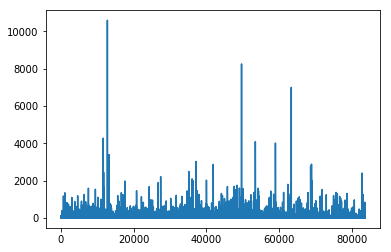

In [12]:
plt.plot(train["revenue"])

In [13]:
X = train.loc[:, train.columns != 'revenue']
y = train["revenue"]

In [14]:
# encode string input values as integers
features = []
encode_cols = ["month", "channelGrouping", "browser", "operatingSystem", "deviceCategory", "continent", 
              "subContinent", "country", "region", "metro", "city", "networkDomain", "topLevelDomain", 
               "campaign", "source", "medium", 
              ]
encode_cols = ["month", "channelGrouping", "browser", "operatingSystem", "deviceCategory", "continent", 
                "subContinent", "country", "region", "metro", "city", "topLevelDomain", "campaign", "source", 
                "medium", "keyword", "referralPath", "adContent", "adwordsClickInfo.page", "adwordsClickInfo.slot",
                "adwordsClickInfo.adNetworkType", "bounces", "newVisits"
              ]

# encode string input values as integers
encoded_x = None
for i in encode_cols:
    col = X[i].apply(str)
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(col.fillna('0'))
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: ", encoded_x.shape)
# encoded_x = np.array(features)
# encoded_x = encoded_x.reshape(X.shape[0], X.shape[1])

X shape:  (83578, 2498)


In [15]:
other_cols = ["visitNumber", "timeSinceLastVisit", "isMobile", "isTrueDirect", "hits", "pageviews"]

In [16]:
X = np.concatenate((X[other_cols].fillna(0), encoded_x), axis=1)

In [17]:
y = Binarizer().transform(y.values.reshape(-1, 1))

In [18]:
print(max(y))
print(min(y))

[1.]
[0.]


In [19]:
print(X.shape)

(83578, 2504)


In [20]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=cv_size)#, random_state=seed)

In [21]:
print(X_train.shape)
print(X_cv.shape)

(58504, 2504)
(25074, 2504)


In [22]:
print(y_train.shape)
print(y_cv.shape)

(58504, 1)
(25074, 1)


In [31]:
xgtrain = xgb.DMatrix(X_train, y_train)
xgcv = xgb.DMatrix(X_cv, y_cv)

In [32]:
# Specify sufficient boosting iterations to reach a minimum
num_round = 500
evallist = [(xgcv, 'eval'), (xgtrain, 'train')]
# Leave most parameters as default
param = {'objective': 'binary:logistic',
         'tree_method': 'gpu_hist', # Use GPU accelerated algorithm
         'lambda': 1.5,
         'alpha': .2,
         }
bst = xgb.train(param, xgtrain, num_round, evallist, early_stopping_rounds=10)

[0]	eval-error:0.05747	train-error:0.054509
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 10 rounds.
[1]	eval-error:0.055755	train-error:0.052749
[2]	eval-error:0.055157	train-error:0.051313
[3]	eval-error:0.055715	train-error:0.050783
[4]	eval-error:0.05408	train-error:0.050133
[5]	eval-error:0.053402	train-error:0.049809
[6]	eval-error:0.053242	train-error:0.048698
[7]	eval-error:0.053123	train-error:0.048373
[8]	eval-error:0.053282	train-error:0.048082
[9]	eval-error:0.052804	train-error:0.047467
[10]	eval-error:0.052923	train-error:0.047416
[11]	eval-error:0.052844	train-error:0.047279
[12]	eval-error:0.052844	train-error:0.046988
[13]	eval-error:0.052245	train-error:0.045946
[14]	eval-error:0.052086	train-error:0.046082
[15]	eval-error:0.052166	train-error:0.045775
[16]	eval-error:0.052644	train-error:0.045706
[17]	eval-error:0.052285	train-error:0.04574
[18]	eval-error:0.052205	train-error:0

In [34]:
# model = xgb.XGBClassifier()
# model.fit(X_train, y_train)

In [35]:
# # specify parameters via map
# param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logistic'}

# # specify validations set to watch performance
# watchlist = [(xgcv, 'eval'), (xgtrain, 'train')]
# num_round = 2
# bst = xgb.train(param, xgtrain, num_round, watchlist)

In [36]:
bst.save_model('more_feat2000.model')

In [40]:
pred = bst.predict(xgcv)

In [41]:
#plot_pred(bst, xgcv, y_cv)

In [42]:
bin_pred = Binarizer(threshold=0.3).transform(pred.reshape(-1,1))
f1 = f1_score(y_cv, bin_pred)
f1

0.705539358600583

In [43]:
print(pred)
print(bin_pred)

[1.7286421e-04 2.0835074e-07 1.1697487e-09 ... 1.5897282e-07 8.4038840e-07
 5.6837627e-05]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [44]:
f1 = f1_score(y_cv, bin_pred)
f1

0.705539358600583

In [45]:
pred = bst.predict(xgtrain)
bin_pred = Binarizer(threshold=0.4).transform(pred.reshape(-1,1))
f1 = f1_score(y_train, bin_pred)
f1

0.921514494182607

In [46]:
def plot_pred(model, x, y):
    pred = model.predict(x)
    f1_list = []
    thresholds = np.linspace(0.15, .55, 100)
    for i in thresholds:
        bin_pred = Binarizer(threshold=i).transform(pred.reshape(-1,1))
        f1 = f1_score(y, bin_pred)
        f1_list.append(f1)
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(f1_list)
    return thresholds[np.argmax(f1_list)]

0.5257575757575758

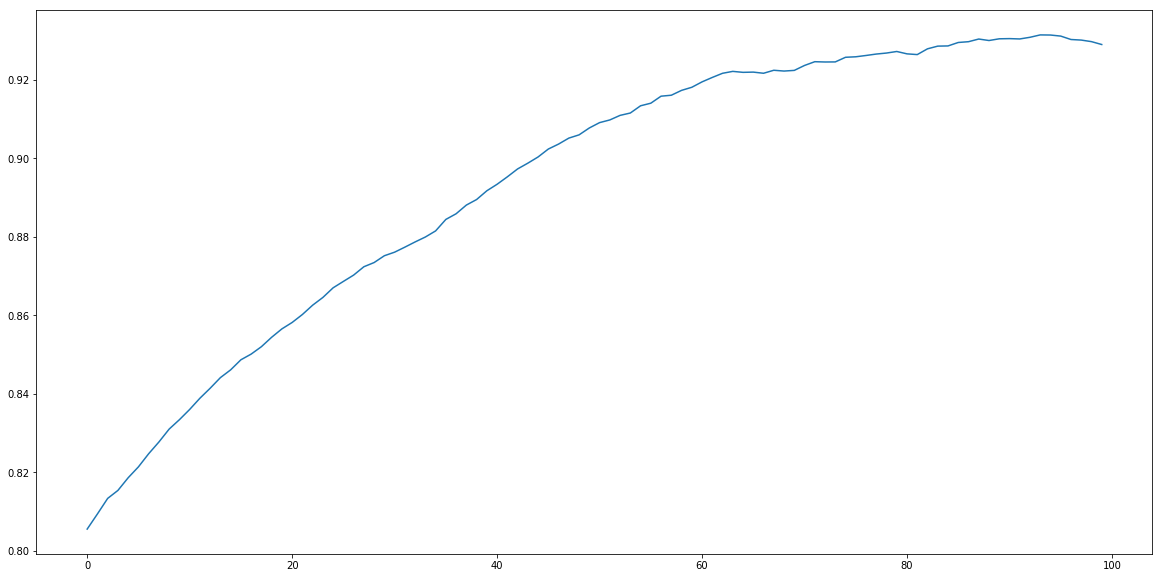

In [47]:
plot_pred(bst, xgtrain, y_train)

In [48]:
bst.get_fscore()

{'f5': 1759,
 'f1485': 18,
 'f1': 1761,
 'f1217': 19,
 'f4': 2058,
 'f2502': 42,
 'f1435': 150,
 'f58': 80,
 'f1082': 56,
 'f458': 18,
 'f3': 229,
 'f496': 13,
 'f475': 73,
 'f279': 51,
 'f242': 12,
 'f1488': 127,
 'f487': 4,
 'f76': 21,
 'f86': 12,
 'f62': 307,
 'f73': 50,
 'f16': 133,
 'f17': 82,
 'f0': 925,
 'f12': 90,
 'f411': 28,
 'f22': 160,
 'f1312': 226,
 'f251': 17,
 'f615': 15,
 'f92': 29,
 'f361': 3,
 'f157': 2,
 'f187': 5,
 'f1187': 64,
 'f1313': 189,
 'f13': 63,
 'f70': 37,
 'f2015': 18,
 'f1499': 9,
 'f25': 9,
 'f1228': 91,
 'f283': 22,
 'f276': 11,
 'f8': 99,
 'f56': 38,
 'f611': 132,
 'f609': 6,
 'f77': 10,
 'f2': 35,
 'f14': 83,
 'f648': 15,
 'f1539': 54,
 'f571': 29,
 'f1206': 6,
 'f102': 13,
 'f931': 41,
 'f454': 8,
 'f47': 67,
 'f1574': 13,
 'f67': 176,
 'f1118': 42,
 'f33': 83,
 'f180': 9,
 'f101': 8,
 'f75': 13,
 'f274': 1,
 'f1533': 18,
 'f11': 48,
 'f1142': 7,
 'f267': 28,
 'f20': 142,
 'f10': 52,
 'f72': 8,
 'f74': 24,
 'f7': 75,
 'f1530': 26,
 'f2500': 2,
 'f9

In [49]:
from bayes_opt import BayesianOptimization

In [50]:
def XGB_CV(
          max_depth,
          gamma,
          min_child_weight,
          max_delta_step,
          subsample,
          colsample_bytree,
          lamb,
          alpha
         ):

    global AUCbest
    global ITERbest
    AUCbest = 0
    ITERbest = 0

#
# Define all XGboost parameters
#

    paramt = {
              'booster' : 'gbtree',
              'max_depth' : int(max_depth),
              'gamma' : gamma,
              'eta' : 0.1,
              'objective' : 'binary:logistic',
              'nthread' : 4,
              'silent' : False,
#               'eval_metric': 'auc',
              'tree_method': 'gpu_hist', # Use GPU accelerated algorithm
              'lambda': lamb,
              'alpha': alpha,
              'subsample' : max(min(subsample, 1), 0),
              'colsample_bytree' : max(min(colsample_bytree, 1), 0),
              'min_child_weight' : min_child_weight,
              'max_delta_step' : int(max_delta_step),
              'seed' : 1001
              }
    log_file = open('test1.log', 'a')
    folds = 5
    cv_score = 0

    print("\n Search parameters (%d-fold validation):\n %s" % (folds, paramt), file=log_file )
    log_file.flush()

    xgbc = xgb.cv(
                    paramt,
                    xgtrain,
                    num_boost_round = 2000,
                    stratified = True,
                    nfold = folds,
                    verbose_eval = 10,
                    early_stopping_rounds = 50,
#                     metrics = 'error',
                    show_stdv = True
               )
    
#     val_score = xgbc['test-auc-mean'].iloc[-1]
#     train_score = xgbc['train-auc-mean'].iloc[-1]
    val_score = xgbc['test-error-mean'].iloc[-1]
    train_score = xgbc['train-error-mean'].iloc[-1]
    print(' Stopped after %d iterations with train-auc = %f val-auc = %f ( diff = %f ) train-gini = %f val-gini = %f' % ( len(xgbc), train_score, val_score, (train_score - val_score), (train_score*2-1),
    (val_score*2-1)) )
#     if (val_score > AUCbest):
#         AUCbest = val_score
#         ITERbest = len(xgbc)

#     return (val_score*2) - 1
    if (val_score < AUCbest):
        AUCbest = val_score
        ITERbest = len(xgbc)

    return 1 - val_score

In [51]:
XGB_BO = BayesianOptimization(XGB_CV, {
                                     'max_depth': (2, 12),
                                     'gamma': (0.001, 10.0),
                                     'min_child_weight': (0, 20),
                                     'max_delta_step': (0, 10),
                                     'subsample': (0.4, 1.0),
                                     'colsample_bytree': (0.4, 1.0),
                                     'lamb': (1.0, 1.7),
                                     'alpha': (0.0, 0.5)
                                    })

In [52]:
XGB_BO.explore({
              'max_depth':            [3, 8, 3, 8, 8, 3, 8, 3],
              'gamma':                [0.5, 8, 0.2, 9, 0.5, 8, 0.2, 9],
              'min_child_weight':     [0.2, 0.2, 0.2, 0.2, 12, 12, 12, 12],
              'max_delta_step':       [1, 2, 2, 1, 2, 1, 1, 2],
              'subsample':            [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              'colsample_bytree':     [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              'lamb':                 [1.0, 1.0, 1.2, 1.2, 1.4, 1.5, 1.0, 1.3],
              'alpha':                [0.0, 0.0, 0.15, 0.15, 0.25, 0.3, 0.1, 0.15]
              })

In [ ]:
XGB_BO.maximize(init_points=2, n_iter=15, acq='ei', xi=0.01)

Initialization
----------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |      lamb |   max_delta_step |   max_depth |   min_child_weight |   subsample | 
   21 | 00m00s |    0.95098 |    0.0000 |             0.6000 |    0.5000 |    1.0000 |           1.0000 |      3.0000 |             0.2000 |      0.6000 | 
   22 | 00m00s |    0.95043 |    0.0000 |             0.8000 |    8.0000 |    1.0000 |           2.0000 |      8.0000 |             0.2000 |      0.8000 | 
   23 | 00m00s |    0.95005 |    0.1500 |             0.6000 |    0.2000 |    1.2000 |           2.0000 |      3.0000 |             0.2000 |      0.6000 | 
   24 | 00m00s |    0.95065 |    0.1500 |             0.8000 |    9.0000 |    1.2000 |           1.0000 |      8.0000 |             0.2000 |      0.8000 | 
   25 | 00m00s |    0.95103 |    0.2500 |         

In [ ]:
plot_pred(bst, xgtrain, y_train)

In [52]:
# use below for later - scales test

In [38]:
# encode string input values as integers
features = []
encoded_x = None
for i in encode_cols:
	label_encoder = LabelEncoder()
	feature = label_encoder.fit_transform(test[i].fillna('0'))
	feature = feature.reshape(test.shape[0], 1)
	onehot_encoder = OneHotEncoder(sparse=False)
	feature = onehot_encoder.fit_transform(feature)
	if encoded_x is None:
		encoded_x = feature
	else:
		encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: ", encoded_x.shape)
# encoded_x = np.array(features)
# encoded_x = encoded_x.reshape(X.shape[0], X.shape[1])
X = np.concatenate((test[other_cols].fillna(0), encoded_x), axis=1)

X shape:  (56208, 1049)
